# Laboratorio 2022-2023

##  Sesión 17: Procesos estocásticos con la propiedad de Markov 


Un proceso estocástico es un sistema que evoluciona con el tiempo de un modo aleatorio. En esta sesión y en la próxima vamos a trabajar con procesos en los que el tiempo es discreto ($t=0, 1, \ldots$) que cumplen la siguiente propiedad, conocida como _propiedad de Markov_:

_La probabilidad de que el sistema evolucione de un modo o de otro a partir de cierto instante $t$ no depende de cómo ha llegado el sistema hasta el estado en el que se encuentra, sino sólo de cuál sea dicho estado y quizá del tiempo $t$_.

Cuando se cumple esta propiedad, se dice que es un **proceso de Markov**. Si además las probabilidades descritas en la frase anterior dependen sólo del estado actual del sistema pero no del tiempo $t$, el proceso se dice **homogéneo**.

Ejemplo de proceso de Markov: tiro un dado sucesivamente, y voy anotando cuál es la puntuación total que he obtenido. Obviamente, si en el instante $t$ (es decir, tras $t$ tiradas) la puntuación total es $N$, hay probabilidad $1/6$ de que en el instante $t+1$ la puntuación total tome cada uno de los valores $N+1, \ldots, N+6$, y ese hecho es independiente de cuáles fueron las $t$ primeras tiradas que totalizaron $N$ puntos.

Ejemplo de proceso que no es de Markov: como el anterior, pero el dado que se usa en cada tirada no tiene sólo seis caras numeradas $(1,2,3,4,5,6)$, sino que a dichas caras se le van añadiendo tantas como tiradas ya efectuadas, y numeradas según los resultados obtenidos.
Supongamos que en $t=1$ la puntuación total es 4. Entonces, la puntuación total que tendré en $t=2$ estará entre 5 y 10, pero...¿con qué probabilidad? Depende de lo que haya sucedido en el pasado. 

En esta sesión vamos a experimentar con dos procesos homogéneos de Markov muy famosos.

------------




**Ejercicio 1.- El paseo aleatorio unidimensional.** Supongamos que una partícula se desplaza a lo largo de la recta real en las siguientes condiciones:

- Inicialmente se encuentra situada en el origen $y=0$.

- Cada segundo que pasa la partícula se desplaza una unidad hacia la derecha, con probabilidad $p$ (constante, independiente del tiempo),  o hacia la izquierda, con probabilidad $q=1-p$.

**a)** Si llamamos $y_n$ a la posición de la partícula en tiempo $n$, una forma de visualizar un recorrido concreto es representar gráficamente una línea poligonal que una, consecutivamente, los puntos $(n,y_n)$ en un cierto rango de tiempo $0\le n \le N$ para un valor $N$ dado. (Nota que en esta representación el desplazamiento de la partícula *hacia la derecha* se representa gráficamente como *subir*, y el desplazamiento *hacia la izquierda* se representa gráficamente como *bajar*). En la siguiente figura se ven tres paseos aleatorios con $p=1/2$ y $0\le n \le 40$:

![Grafica_Montecarlo](paseos.png)

Escribe una función de Sage que dependa de la probabilidad $p$ de ir a la derecha y de la cota temporal $N$ y devuelva la representación gráfica de un paseo aleatorio unidimensional con probabilidad $p$ de *ir a la derecha* (es decir, arriba en la gráfica), para el rango de tiempo $0\le n \le N$. Experimenta y observa los resultados que produce tu programa para N=1000 y distintos valores de $p$.

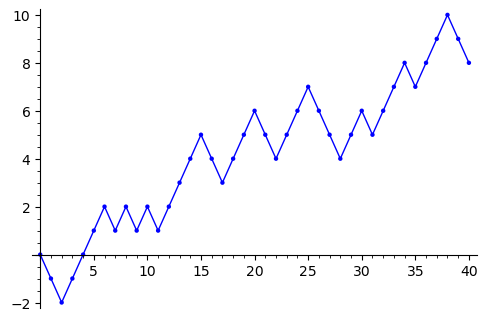

In [1]:
p = 1/2
M = 40
t, y = 0, 0
puntos=[(t,y)]
for _ in xsrange(M):
    t+=1
    if random()<p:
        y += 1
    else:
        y -= 1
    puntos.append((t,y))
grafica = points(puntos) + line(puntos)
grafica.show(figsize=5)
    

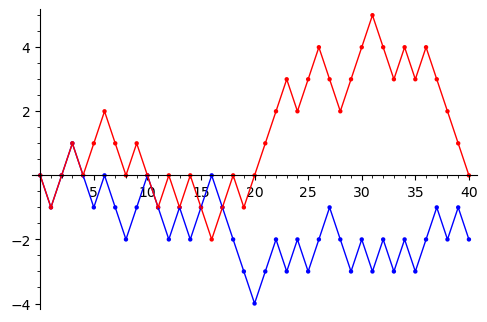

In [6]:
def paseo_aleatorio(p, M, col='blue'):
    t, y = 0, 0
    puntos=[(t,y)]
    for _ in xsrange(M):
        t+=1
        if random()<p:
            y += 1
        else:
            y -= 1
        puntos.append((t,y))
    grafica = points(puntos, color=col) + line(puntos,color=col)
    return grafica

dosCaminos = paseo_aleatorio(1/2,40) + paseo_aleatorio(1/2,40,'red')
dosCaminos.show(figsize=5)
# grafica = paseo_aleatorio(1/3,1000,'red')
# grafica.show(figsize=5)

A continuación, vamos a realizar algunos experimentos para corroborar algunas propiedades muy interesantes del paseo aleatorio unidimensional (para aprender más sobre paseos aleatorios <a href="https://en.wikipedia.org/wiki/Random_walk" target="_blank">puedes pinchar aquí</a>.

- En un *paseo simétrico* ($p=0.5$) que transcurra indefinidamente ($N \to \infty$), la probabilidad de volver alguna vez al origen es 1. Es decir, si se continúa el paseo indefinidamente "todas" las trayectorias volverán alguna vez al origen.

- Pese a lo anterior, el valor esperado (el promedio) del primer tiempo $n$ tal que el paseo aleatorio vuelve al origen es $\infty$. Simplificando: "todos" los paseos volverán alguna vez al origen, pero algunos tardarán muchísimo tiempo en hacerlo. 

- De hecho, para cualquier natural r, un paseo aleatorio simétrico que se prolongue indefinidamente alcanza en algún momento el valor y=r ó y=-r  con probabilidad 1.

- Las cosas cambian si el paseo no es simétrico ($p\neq 0.5$). Por ejemplo, en un paseo aleatorio unidimensional no simétrico la probabilidad de volver eventualmente al origen ya no es 1.

**b)** Escribe una función que dependa de $p$ y de una cota $N$ y devuelva el primer valor de $n$ tal que el paseo ha vuelto al origen en tiempo $n$ si es que tal $n$ existe, o 0 si el paseo aún no ha vuelto al origen al llegar al tiempo $n=N$. 

A continuación, realiza $10^4$ paseos aleatorios simétricos ($p=0.5$) con tope temporal sucesivamente elegido como $N=10^3, 10^4$ o $10^5$ y calcula en cada caso qué porcentaje del total son paseos que han vuelto al origen y cuánto han tardado en media en volver al origen por primera vez los que sí lo han hecho.

(**Notas**: como no hace falta, por supuesto, representar gráficamente estos paseos para responder a la pregunta, no necesitas almacenar todos los puntos $(n,y_n)$ para $n=0,1,\ldots$. Además ten en cuenta que no es necesario recorrer los $N$ pasos en todos los paseos, sino que se debe parar el paseo una vez se vuelve al origen, si es que eso sucede).

In [3]:
def paseo_origen(p, M):
    y,t = 0,0
    
    for _ in xsrange(M):
        t+=1
        if random()<p:
            y += 1
        else:
            y -= 1
        if y == 0:
            return t
        
    return 0

# Cuanto más pequeño M, más probabilidades de que no pase por el origen.
paseos = [paseo_origen(1/2,100) for _ in xsrange(20)]
cantidad = paseos.count(0)
print(f"{20 - cantidad} paseos de los creados han pasado por el origen y {cantidad} no lo han hecho")
print(paseos)

19 paseos de los creados han pasado por el origen y 1 no lo han hecho
[2, 4, 2, 2, 50, 22, 2, 36, 10, 2, 2, 8, 2, 20, 2, 0, 2, 2, 2, 6]


In [4]:
# Mostramos los resultados en forma de tabla

p=0.5
repeticiones=10^4

print(' '*3+'p=',p.n(digits=2))
print(' '*10)

#Encabezamiento de la tabla
print(' '*3+'Pasos',' '+'% Vuelven', ' '*3+'Tardan')
print('-----------------------------')
for j in xsrange(1,7):
    N=10^j
    suma=0
    vuelven=0
    for _ in xsrange(repeticiones):
        nuevo=paseo_origen(p, N)
        if nuevo>0:
            suma+=nuevo
            vuelven+=1
    promedio=(suma/vuelven).n(digits=5) 
    print('%8s %10.2f %9.2f' % (N, (100*vuelven/repeticiones).n(digits=5),promedio))

   p= 0.50
          
   Pasos  % Vuelven    Tardan
-----------------------------
      10      74.79      3.28
     100      91.84      8.64
    1000      97.41     26.86
   10000      99.33     70.77
  100000      99.72    235.50
 1000000      99.93    632.16


In [5]:
# Montecarlo
p,M = 1/2, 1e4
MM = 1e3
exitos = 0
suma = 0
for _ in xsrange(MM):
    sorteo = paseo_origen(p,M)
    if sorteo != 0:
        exitos += 1
    suma += sorteo
    
print(exitos/MM, suma/exitos.n()) # Suma/exitos = media

0.995000000000000 57.8472361809045


In [6]:
# Montecarlo
p,M = 1/2, 1e4
MM = 1e4
exitos = 0
suma = 0
for _ in xsrange(MM):
    sorteo = paseo_origen(p,M)
    if sorteo != 0:
        exitos += 1
    suma += sorteo
    
print(exitos/MM, suma/exitos.n()) 

0.991800000000000 77.4150030248034


**c)** Escribe una función que dependa de $p>0$, $r\in \mathbb{N}$ y $N$ y devuelva True si un paseo aleatorio con probabilidad $p$ de ir a la derecha alcanza el valor $y=r$ ó $y=-r$ en algún instante $n \le N$.

Fijando $p=0.5$ (paseo simétrico) y $r=100$, realiza $1000$ paseos aleatorios de longitud máxima $N=10^3$ y calcula qué porcentaje de ellos alcanzan el nivel $y=r$ ó $y=-r$ en algún momento. Repite el cálculo para $N=10^4$ y $N=10^5$.

In [7]:
def corte_nivel(p, r, N):
    Y=0
    if random()<p: Y+=1
    else: Y+=-1
    pasos=1
    while pasos<N and abs(Y)!=r:
        pasos+=1
        if random()<p: Y+=1
        else: Y+=-1
    return abs(Y)==r

corte_nivel(0.5, 12, 10), corte_nivel(0.5, 12, 30), corte_nivel(0.5, 12, 1000)

(False, False, True)

In [8]:
repeticiones=1000
p, r=1/2,100
potmin,potmax=3,5 # potencias máxima y mínima para las que se hace el cálculo

print(' '*3+'p=',p,' '*3+'r=',r)
print(' '*10)

#Encabezamiento de la tabla
print(' '*3+'Pasos',' '+'% Llegan')
print('-----------------------------')
for j in xsrange(potmin,potmax+1):
    N=10^j
    exitos=0
    for _ in xsrange(repeticiones):
        exitos+=corte_nivel(p, r, N)
    print('%8s %10.2f' %(N, (100*exitos/repeticiones).n(digits=4)))

   p= 1/2    r= 100
          
   Pasos  % Llegan
-----------------------------
    1000       0.50
   10000      62.10
  100000     100.00


**d)** Experimenta qué sucede con los apartados b) y c) si el paseo no es simétrico (toma $p$ diferente a 0.5 y prueba).

In [10]:
#d)
p=0.6
repeticiones=10^4
potmin,potmax=1,4

#Encabezamiento de la tabla
print(' '*3+'Pasos',' '+'% Vuelven', ' '*3+'Tardan')
print('-----------------------------')
for j in xsrange(potmin,potmax+1):
    N=10^j
    suma=0
    vuelven=0
    for _ in xsrange(repeticiones):
        nuevo=paseo_origen(p, N)
        if nuevo>0:
            suma+=nuevo
            vuelven+=1
    promedio=(suma/vuelven).n(digits=5) 
    print('%8s %10.2f %9.2f' % (N, (100*vuelven/repeticiones).n(digits=5),promedio))

   Pasos  % Vuelven    Tardan
-----------------------------
      10      70.34      3.17
     100      80.37      5.96
    1000      79.74      5.96
   10000      79.93      5.92


In [11]:
repeticiones=1000
p, r=0.52,100
potmax=5

print(' '*3+'p=',p.n(digits=2),' '*3+'r=',r)
print(' '*10)

#Encabezamiento de la tabla
print(' '*3+'Pasos',' '+'% Llegan')
print('-----------------------------')
for j in xsrange(3,potmax+1):
    N=10^j
    exitos=0
    for _ in xsrange(repeticiones):
        exitos+=corte_nivel(p, r, N)
    print('%8s %9.2f' %(N, (100*exitos/repeticiones).n(digits=4)))

   p= 0.52    r= 100
          
   Pasos  % Llegan
-----------------------------
    1000      4.30
   10000    100.00
  100000    100.00


----------------

**Ejercicio 2.-** Una descripción matemática clásica de difusión por una membrana es el famoso **modelo de urnas de Ehrenfest.** 

![Urnas_Ehrenfest](ehrenfest.png)

Imaginemos dos contenedores con un
total de $2a$ bolas (moléculas). Supongamos que el primer contenedor, etiquetado $A$, contiene $k$ bolas y el segundo, que etiquetamos con una $B$, contiene las $2a-k$ bolas restantes. Se parte de una configuración inicial, y en cada paso se elige al azar una de las bolas (todas las selecciones son igualmente probables) del total de las bolas y se cambia de contenedor (una molécula traspasa la membrana al azar). Las bolas fluctúan entre los dos contenedores, con más probabilidad de que el flujo sea hacia el de menos bolas, de forma que se espera que el valor de $k$, y el de $2a-k$, esté la mayor parte del tiempo próximo al *valor de equilibrio*  $k=a$.

**a)** Crea una función que dependa de $a$ y del número $N$ de pasos que vamos a dejar evolucionar el sistema. Tu función debe elegir un estado inicial aleatoriamente y contar cuántas veces el sistema ha pasado por cada estado (los estados son los posibles valores del número de bolas en el primer contenedor). Debes hacer un diccionario de frecuencias con los estados como claves y las correspondientes frecuencias como valores: el output de tu función debe ser una gráfica con pares (estado, frecuencia), que será el resultado de aplicar el comando $\texttt{points}$ a los items del diccionario construído. Debes poder comprobar experimentalmente que la distribución de pasos por los estados está centrada precisamente en $k=a$, y cuanto mayor sea $a$ más concentrada estará dicha distribución en torno al valor central $k=a$.


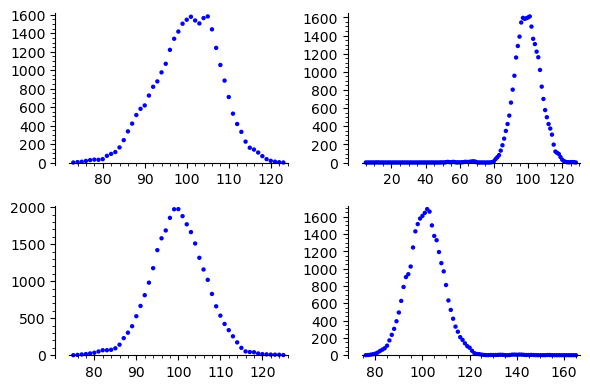

In [59]:
def modelo_urnas(a, N):
    inicial = randint(0, 2*a)
    estados = dict([(inicial,1)]) # Diccionario con los estados.
    
    k = inicial
    for _ in xsrange(N):
        if random() < k/(2*a):
            k -= 1
        else:
            k += 1
        if k in estados:
            estados[k] += 1
        else:
            estados[k] = 1
    
    return points(estados.items())

show(graphics_array([[modelo_urnas(100,30000), modelo_urnas(100,30000)],[modelo_urnas(100,30000), modelo_urnas(100,30000)]]))
# grafica = modelo_urnas(50, 30)
# grafica.show()
    

**b)** Se sabe teóricamente que si se deja evolucionar el sistema un tiempo suficientemente largo, es seguro que volverá a su configuración inicial. Cuánto tiempo tarde en hacerlo en promedio depende de cómo de desequilibrada fuese la configuración inicial.

Por ejemplo, si se parte de la situación de equilibrio $k=a$, el tiempo (número de pasos) promedio que el sistema tarda en volver a la posición de equilibrio es asintóticamente (es decir, para $a$ grande) igual a $\sqrt{\pi a}$. Realiza experimentos que corroboren esta afirmación. En particular, comprueba que si se tienen 100 partículas repartidas inicialmente por igual entre ambos contenedores ($a=50$) y cada paso representa un segundo, se espera que tarden aproximadamente 13 segundos en volver a repartirse equilibradamente.

In [12]:
def ehrenfest2(a):
    urna1=a #estado inicial de equilibrio k=a
    if random()<urna1/(2*a):
        urna1+=-1
    else:
        urna1+=1
    pasos=1
    while urna1!=a:
        pasos+=1
        if random()<urna1/(2*a):
            urna1+=-1
        else:
            urna1+=1
    return pasos

[ehrenfest2(50) for _ in xsrange(10)]

[2, 94, 2, 50, 4, 2, 2, 74, 10, 40]

In [13]:
repeticiones=10^5

#Encabezamiento de la tabla
print(' '*3+'a',' '*4+'t sim.',' '*2+'t teor.')
print('--------------------------')
for a in [50,100,1000]:
    total=0
    for _ in xsrange(repeticiones):
        total+=ehrenfest2(a)
    print('%4s %9.3f %9.3f' %(a,(total/repeticiones).n(), sqrt(pi*a).n()))

   a     t sim.   t teor.
--------------------------
  50    12.415    12.533
 100    17.681    17.725
1000    56.768    56.050


**c)**  Por el contrario, si se parte de la situación más desequilibrada posible (todas las partículas inicialmente en el mismo contenedor), el tiempo esperado que tardará el sistema en volver a esa situación es $2^{2a}$ segundos (¡que, con $a=50$ corresponde a $4\cdot 10^{22}$ años!). Realiza experimentos **PRUDENTES** que ilustren esta afirmación (tomando $a=5$ y $10^4$ repeticiones del experimento para calcular con ellas el promedio que se tarda en volver al estado inicial el cálculo ya tarda un buen rato, así que no uses valores más altos o no conseguirás que Sage pueda hacerlo en un tiempo razonable).

In [14]:
def ehrenfest3(a):
    urna1=0 #estado inicial de total desequilibrio
    if random()<urna1/(2*a):
        urna1+=-1
    else:
        urna1+=1
    pasos=1
    while urna1!=0:
        pasos+=1
        if random()<urna1/(2*a):
            urna1+=-1
        else:
            urna1+=1
    return pasos

[ehrenfest3(5) for _ in xsrange(10)]

[64, 2440, 566, 3230, 266, 1064, 554, 390, 1780, 410]

In [15]:
t0=walltime()
a=5
repeticiones=10^4
total=0
for _ in xsrange(repeticiones):
    total+=ehrenfest3(a)
print('tiempo simulando=',(total/repeticiones).n(digits=9))
print('tiempo teórico=',2^(2*a))
walltime(t0)

tiempo simulando= 1028.73760
tiempo teórico= 1024


19.879415273666382